# Import libs

In [36]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

# Load and plot the image

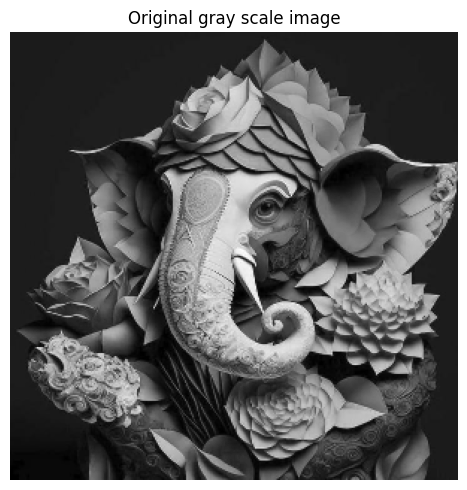

In [37]:
# set the param
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# define the kernel
kernel = tf.constant([[-1, -1, -1],
                      [-1, 8, -1],
                      [-1, -1, -1]])

# Load the image
image = tf.io.read_file('C:/Users/amhab/Desktop/ConvNet/Ganesh.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, [300, 300])

# plot the image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original gray scale image')
plt.show()

# Convolution layer

In [38]:
# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# Convolution layer
conv_fn = tf.nn.conv2d
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME',
)

# Activation layer

In [39]:
relu_fn = tf.nn.relu
image_detect = relu_fn(image_filter)

# Pooling layer

In [40]:
pool = tf.nn.pool
image_condense = pool(input=image_detect,
                      window_shape=(2, 2),
                      pooling_type= 'MAX',
                      strides=(2, 2),
                      padding='SAME',
                      )

# Plot results

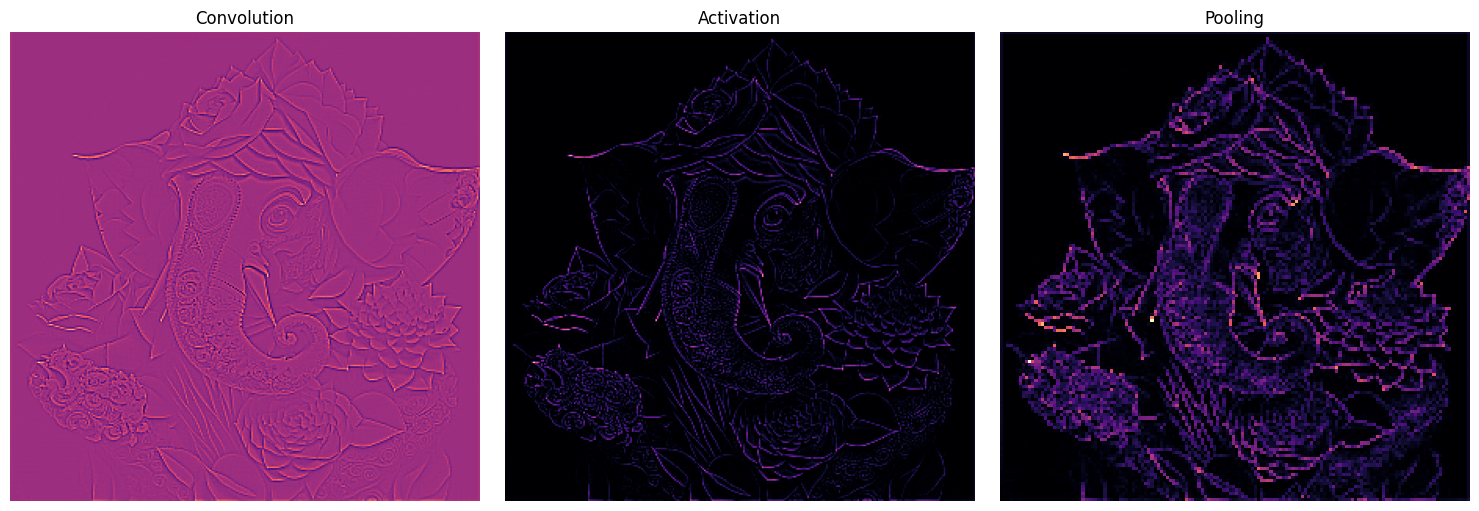

In [41]:
plt.figure(figsize=(15, 5))

# Plot the convolved image
plt.subplot(1, 3, 1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Convolution')

# Plot the Activation layer
plt.subplot(1, 3, 2)
plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)
plt.axis('off')
plt.title('Activation')

# Plot the pooling layer
plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()